<a href="https://colab.research.google.com/github/IvonneTZapataM/PDS_20251/blob/main/Tarea3SDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

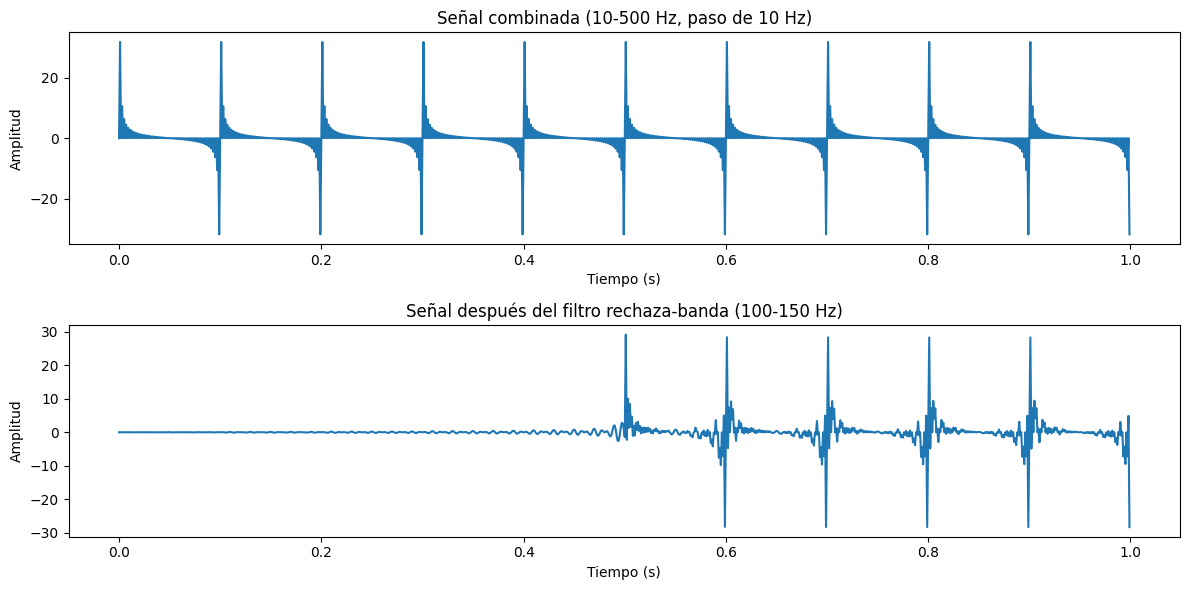

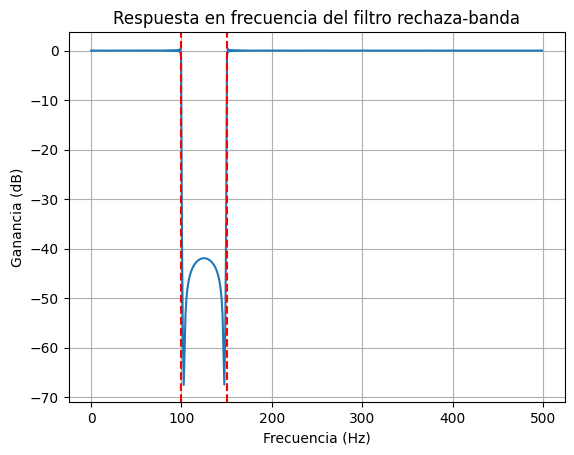

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Configuración inicial
sample_rate = 1000  # Frecuencia de muestreo (Hz)
duration = 1.0      # Duración de la señal (segundos)
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# PRIMERA PARTE: Generar ecualizador de bandas (10-500 Hz, de 10 en 10 Hz)
frequencies = np.arange(10, 501, 10)  # Frecuencias de 10 a 500 Hz, paso de 10 Hz
signal_combined = np.zeros_like(t)

# Sumar sinusoides para cada frecuencia
for freq in frequencies:
    amplitude = 1.0  # Amplitud igual para todas las frecuencias
    signal_combined += amplitude * np.sin(2 * np.pi * freq * t)

# Graficar la señal combinada
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal_combined)
plt.title('Señal combinada (10-500 Hz, paso de 10 Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# SEGUNDA PARTE: Aplicar filtro rechaza-banda (bandstop) con corte rectangular
# Frecuencias de corte del rechaza-banda
lowcut = 100  # Frecuencia inferior del rechazo (Hz)
highcut = 150 # Frecuencia superior del rechazo (Hz)

# Diseñar filtro FIR con ventana rectangular (orden alto para corte abrupto)
order = 1001  # Orden del filtro (alto para corte abrupto)
nyquist = 0.5 * sample_rate
low = lowcut / nyquist
high = highcut / nyquist
b = signal.firwin(order, [low, high], pass_zero='bandstop', window='boxcar')

# Aplicar filtro a la señal
filtered_signal = signal.lfilter(b, 1.0, signal_combined)

# Graficar señal filtrada
plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Señal después del filtro rechaza-banda (100-150 Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()

# Graficar respuesta en frecuencia del filtro
plt.figure()
w, h = signal.freqz(b, fs=sample_rate)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Respuesta en frecuencia del filtro rechaza-banda')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.axvline(lowcut, color='red', linestyle='--')
plt.axvline(highcut, color='red', linestyle='--')
plt.grid()
plt.show()